# **1. Import Library**

In [18]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from gensim.models import Word2Vec
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Embedding, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from textblob import TextBlob
from tensorflow.keras.models import Sequential

# Download NLTK resources
nltk.download("stopwords")
nltk.download("all")

[nltk_data] Downloading package stopwords to C:\Users\Dicky
[nltk_data]     Zulfikar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Dicky
[nltk_data]    |     Zulfikar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Dicky
[nltk_data]    |     Zulfikar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Dicky
[nltk_data]    |     Zulfikar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Dicky
[nltk_data]    |     Zulfikar\AppData\Roaming\nltk_d

True

# **2. Load Dataset**

In [94]:
data = pd.read_csv("gojek_reviews.csv")
data.sample(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
8605,4d88d8a6-db24-4dac-85a1-f48a219c03b5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,(tidak bisa konfirmasi ke Gojek) tanggal trans...,2,0,NaN,2019-06-06 07:46:06,NaN,NaN,NaN
5764,cac4910d-2de6-4797-b315-1de4d438b2b6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Senang pakai aplikasi ini, lebih mudah untuk b...",5,0,5.1.2,2024-11-19 09:29:15,NaN,NaN,5.1.2
3352,e79144af-ad7c-4aa1-ba92-92cc12f986d4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Setelah nulis alamat tujuan malah tiba"" balik ...",5,1,4.93.1,2024-09-07 08:49:34,NaN,NaN,4.93.1
4953,e6b3d7b7-4563-4ddd-96f3-2311cd2a8ece,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Saya lebih sering pakai aplikasi gofood, tapi ...",3,0,3.24.0,2019-03-20 09:40:12,NaN,NaN,3.24.0
3812,e6027adf-0f90-462c-9f60-aa90e43fa941,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sudah cukup baik. Masukan saya, pencarian driv...",4,34,3.39.2,2019-11-11 05:21:00,NaN,NaN,3.39.2
4433,4f42fce3-7a02-441f-99e8-ee0d4b28b72e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Driver slow respon kalau tujuannya dekat,1,3,5.6.1,2025-01-14 11:53:55,"Mohon maaf atas kendalanya, Kak Rinto. Kesulit...",2025-01-14 13:19:26,5.6.1
6445,f30802b4-73e2-4b8f-abe1-4c0b8145167c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,apalah ribet anj lagi buru buru juga klo login...,1,0,4.93.1,2024-08-31 12:59:47,NaN,NaN,4.93.1
4780,b81a8131-d24b-4d75-9e3a-be33b3c9df54,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sangat sangat sangat mengecewakan, transaksi b...",1,12,4.30.1,2021-10-19 10:21:31,"Hai Qiqi Fatmala, mohon maaf atas kendala yang...",2021-10-03 04:53:28,4.30.1
2200,61f7e930-e84a-4cff-8ba7-1a496f64ce95,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mohon maps nya itu diuodate jadi saya kalau me...,1,0,5.3.1,2024-12-09 06:55:54,"Hai, Kak @Bocil Woyyow. Pastikan kamu sudah me...",2024-12-09 09:10:31,5.3.1
75,2b52e9e6-88d4-4f9e-a7a2-88e4cd904b28,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ribet, beda jauh dengan MAXIM, Kalau MAXIM Sim...",1,14,5.6.1,2025-01-07 15:26:28,"Hai, Kak @Bg Moes. Pastikan kamu sudah memberi...",2025-01-07 16:45:05,5.6.1


# **3. Exploratory Data Analysis (EDA)**

### 1. Memahami Struktur Data

In [95]:
# Periksa dimensi dataset (jumlah baris dan kolom)
print('DataFrame Composition:\nColumns: {} \nRows: {}'.format(data.shape[1],data.shape[0]))

DataFrame Composition:
Columns: 11 
Rows: 10500


In [96]:
# Cek informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10500 non-null  object
 1   userName              10500 non-null  object
 2   userImage             10500 non-null  object
 3   content               10500 non-null  object
 4   score                 10500 non-null  int64 
 5   thumbsUpCount         10500 non-null  int64 
 6   reviewCreatedVersion  8969 non-null   object
 7   at                    10500 non-null  object
 8   replyContent          5811 non-null   object
 9   repliedAt             5811 non-null   object
 10  appVersion            8969 non-null   object
dtypes: int64(2), object(9)
memory usage: 902.5+ KB


In [97]:
# Cek jumlah nilai kosong (missing values)
print(data.isnull().sum())

reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    1531
at                         0
replyContent            4689
repliedAt               4689
appVersion              1531
dtype: int64


In [98]:
# Hapus kolom yang tidak diperlukan
data = data.drop(columns=["reviewId", 
                        "userName", 
                        "userImage", 
                        "thumbsUpCount", 
                        "reviewCreatedVersion", 
                        "at", 
                        "appVersion", 
                        "replyContent", 
                        "repliedAt"])
data.head()

,content,score
0,terlalu terlalu terlalu... apk yg tidak bisa d...,1
1,Aplikasi sebenernya bagus. Cuma kurang suka aj...,2
2,"Aplikasi sekarang ini makin jelek banget, gofo...",3
3,"Kecewa berkali2 sama gojek, pesen makan ga dap...",1
4,Ga pernah bisa 100% percaya dgn map nya gojek ...,1


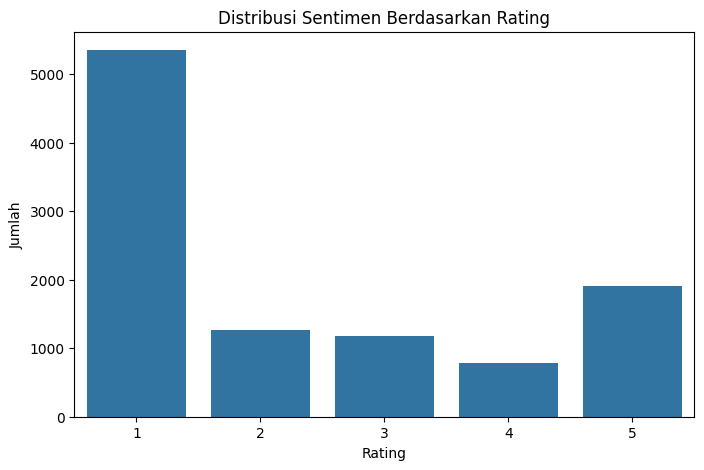

In [99]:
# Cek distribusi rating untuk menentukan sentimen
plt.figure(figsize=(8,5))
sns.countplot(x=data['score'])
plt.title("Distribusi Sentimen Berdasarkan Rating")
plt.xlabel("Rating")
plt.ylabel("Jumlah")
plt.show()

# **4. Preprocessing Teks**

In [ ]:
# Penghapusan stopwords
stop_words = set(stopwords.words("indonesian"))

# Stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def preprocess_text(text):
    if isinstance(text, str): 
        text = text.lower()  
        text = re.sub(r"\d+", " ", text) 
        text = text.translate(str.maketrans("", "", string.punctuation))  
        text = text.replace("\\t", " ").replace("\\n", " ").replace("\\u", " ").replace("\\", "")  
        text = re.sub(r"\s+", " ", text).strip()  
        words = word_tokenize(text)  
        words = [word for word in words if word not in stop_words]  
        words = [stemmer.stem(word) for word in words] 
        return " ".join(words)
    return ""

data["cleaned_text"] = data["content"].apply(preprocess_text)

In [104]:
data.head()

,content,score,cleaned_text
0,terlalu terlalu terlalu... apk yg tidak bisa d...,1,apk yg percaya kuota cepat abis update tp bug ...
1,Aplikasi sebenernya bagus. Cuma kurang suka aj...,2,aplikasi sebenernya bagus suka aja sistem deli...
2,"Aplikasi sekarang ini makin jelek banget, gofo...",3,aplikasi jelek banget gofood jarang banget pro...
3,"Kecewa berkali2 sama gojek, pesen makan ga dap...",1,kecewa kali gojek sen makan ga dapet dapet dri...
4,Ga pernah bisa 100% percaya dgn map nya gojek ...,1,ga percaya dgn map nya gojek setting rumah set...


In [105]:
# Menyimpan dataset hasil preprocessing
data.to_csv("data_cleaned.csv", index=False)

In [46]:
# Membaca Data Hasil Pre-Processing
df = pd.read_csv("data_cleaned.csv")
df.sample(10)

,content,score,cleaned_text
3716,GO-JEK tidak punya solusi mengenai masalah Lup...,1,gojek solusi lupa pin gopay nomor handphone yg...
2066,Orang orang pada kenapa dah banyak drama sekal...,5,orang orang dah drama sekali padahal gojek apk...
6868,"Sebaiknya stop menggunakan aplikasi ini, aplik...",1,stop aplikasi aplikator pikir untung usaha per...
793,Masa sih penyelesaian ny ngg profesional bngt ...,1,sih selesai ny ngg profesional bngt gw gk seng...
3892,Saya merasa bahwa keamamanan akun masih kurang...,1,keamamanan akun kurangsaya info uang aplikasi ...
2822,Makin lama kok aplikasinya makin ribet.. lebih...,4,aplikasi ribet suka kayak yg simpel ribet bgt ...
6366,"Saya sudah lumayan lama menggunakan gojek, dan...",2,lumayan gojek belanja paylater aktif
4705,Untuk gofood nih.. kok bisa2nya vocher untuk p...,2,gofood nih nya vocher potong harga makan tp ta...
4217,Sebenarnya aplikasi nya bagus Hanya saja beber...,3,aplikasi nya bagus aplikasi bikin emosi driver...
9673,sangat buruk. penanganan masalah lambat. siste...,1,buruk tangan lambat sistem kendala notice user...


# **5. Menentukan Label Sentimen (Positif, Netral, Negatif)**

In [47]:
def label_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity  

    if polarity > 0:
        return "positif"
    elif polarity == 0:
        return "netral"
    else:
        return "negatif"

df['label'] = df['cleaned_text'].apply(label_sentiment)

In [48]:
# Cek distribusi label
print(df['label'].value_counts())

label
netral     8797
positif     957
negatif     746
Name: count, dtype: int64


In [51]:
df.sample(10)

,content,score,cleaned_text,label
3715,Sy pernah kecewa dalam pemesanan gofood yg tid...,1,sy kecewa mesan gofood yg batal itungan detik ...,netral
10343,Maaf saya beri bintang 2 Tolong perbaiki titik...,2,maaf bintang tolong baik titik jemput pilih se...,netral
7901,Lelet . Pesen gofood udh pakek express nyampek...,1,lelet sen gofood udh pakek express nyampek men...,netral
6353,"Terimakasih banyak Gojek, benar-benar membantu...",5,terimakasih gojek benarbenar bantu aplikasi tr...,netral
5387,"Ga bs bayar gopaylater, tagihannya ga muncul m...",1,ga bs bayar gopaylater tagih ga muncul mepet n...,netral
3190,Edukasi lagi driver driver nya terutama driver...,1,edukasi driver driver nya driver gocar udah ng...,netral
5149,"gps terlalu delay lama, app kurang normal saat...",5,gps delay app normal back back arah do back pi...,positif
5333,Tolong dong di tambahin lagi promo nya Promony...,4,tolong tambahin promo nya promonya ga kya,netral
7854,"Semenjak munculnya update pada tanggal 18, men...",2,semenjak muncul update tanggal menu jemput rum...,netral
2873,Di versi skrg ini menurut saya kurang bagus. R...,1,versi skrg bagus riwayat detail pesan bentuk t...,positif


# **6. Memisahkan fitur (X) dan target (y)**

In [52]:
X = df["cleaned_text"]
y = df["label"].map({"negatif": 0, "netral": 1, "positif": 2})

# **7. Ekstrasi Fitur & Imbalance Dataset**

### Ekstrasi Fitur dengan TF-IDF

In [53]:
# Ekstrasi dengan TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  
X_tfidf = tfidf_vectorizer.fit_transform(X)  

feature_names = tfidf_vectorizer.get_feature_names_out()  
df_tfidf = pd.DataFrame.sparse.from_spmatrix(X_tfidf, columns=feature_names)
df_tfidf

,aamiin,abai,abal,abang,abis,absah,abu,ac,acak,acara,...,yo,yogyakarta,you,youtube,ytb,yth,yuk,zaman,zonk,zoom
0,0.0,0.0,0.0,0.0,0.171123,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10496,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10497,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10498,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Imbalance Dataset dengan SMOTE

In [54]:
# Imbalance dataset hasil ekstrasi fitur TF-IDF
smote = SMOTE(random_state=42)
X_resampled_tfidf, y_resampled_tfidf = smote.fit_resample(X_tfidf, y)

print(pd.Series(y_resampled_tfidf).value_counts())

label
1    8797
0    8797
2    8797
Name: count, dtype: int64


# **9. Split Data Train & Test**

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_tfidf, y_resampled_tfidf, test_size=0.2, random_state=42)
print(X_train.shape) 

(21112, 5000)


# **10.  Training Model**

In [ ]:
#  konversi dan reshaping data
if hasattr(X_train, "toarray"):  
    X_train = X_train.toarray()
    X_test = X_test.toarray()

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [61]:
# Model LSTM
model = Sequential([
    LSTM(256, activation="tanh", return_sequences=True, input_shape=(1, 5000)),
    Dropout(0.5),
    
    LSTM(128, activation="tanh", return_sequences=True),
    Dropout(0.5),
    
    LSTM(64, activation="tanh", return_sequences=False),
    BatchNormalization(),
    Dropout(0.5),

    Dense(128, activation="relu"),
    Dropout(0.3),

    Dense(3, activation="softmax")
])

# Compile Model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Training Model
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=10, batch_size=32)

Epoch 1/10
660/660 ━━━━━━━━━━━━━━━━━━━━ 69s 90ms/step - accuracy: 0.7479 - loss: 0.5335 - val_accuracy: 0.9818 - val_loss: 0.0646
Epoch 2/10
660/660 ━━━━━━━━━━━━━━━━━━━━ 55s 83ms/step - accuracy: 0.9797 - loss: 0.0607 - val_accuracy: 0.9922 - val_loss: 0.0287
Epoch 3/10
660/660 ━━━━━━━━━━━━━━━━━━━━ 85s 87ms/step - accuracy: 0.9897 - loss: 0.0320 - val_accuracy: 0.9913 - val_loss: 0.0296
Epoch 4/10
660/660 ━━━━━━━━━━━━━━━━━━━━ 85s 91ms/step - accuracy: 0.9914 - loss: 0.0238 - val_accuracy: 0.9939 - val_loss: 0.0321
Epoch 5/10
660/660 ━━━━━━━━━━━━━━━━━━━━ 60s 90ms/step - accuracy: 0.9928 - loss: 0.0248 - val_accuracy: 0.9890 - val_loss: 0.0499
Epoch 6/10
660/660 ━━━━━━━━━━━━━━━━━━━━ 60s 91ms/step - accuracy: 0.9943 - loss: 0.0177 - val_accuracy: 0.9945 - val_loss: 0.0338
Epoch 7/10
660/660 ━━━━━━━━━━━━━━━━━━━━ 59s 90ms/step - accuracy: 0.9946 - loss: 0.0160 - val_accuracy: 0.9937 - val_loss: 0.0249
Epoch 8/10
660/660 ━━━━━━━━━━━━━━━━━━━━ 61s 93ms/step - accuracy: 0.9965 - loss: 0.0116 - 

In [62]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 1, 256)         │     5,383,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 1, 128)         │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,915,723 (64.53 MB)

 Trainable params: 5,638,531 (21.51 MB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 11,277,064 (43.02 MB)

# **11. Evaluasi Model**

### 1. Akurasi dan Loss

In [63]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f}")
print(f"Akurasi: {accuracy:.4f}")

165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9969 - loss: 0.0298
Loss: 0.0238
Akurasi: 0.9964


### 2. Confusion Matrix

165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step


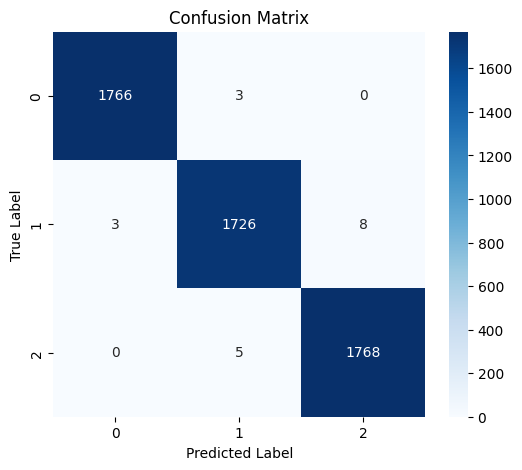

In [64]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### 3. Classification Report

In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_classes, target_names=["Class 0", "Class 1", "Class 2"]))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      1769
     Class 1       1.00      0.99      0.99      1737
     Class 2       1.00      1.00      1.00      1773

    accuracy                           1.00      5279
   macro avg       1.00      1.00      1.00      5279
weighted avg       1.00      1.00      1.00      5279

